In [1]:
#Import cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = "/Users/brewaterman/Desktop/gwlevelst17.txt"
df = pd.read_csv(data, sep = "\t", comment = "#")
df.head(5)

,agency_cd,site_no,site_tp_cd,lev_dt,lev_tm,lev_tz_cd,lev_va,sl_lev_va,sl_datum_cd,lev_status_cd,lev_agency_cd,lev_dt_acy_cd,lev_acy_cd,lev_src_cd,lev_meth_cd,lev_age_cd
0,5s,15s,6s,10d,5d,5s,12s,12s,10s,1s,5s,1s,1s,1s,1s,1s
1,USGS,384253099180701,GW,2004-08-17,09:15,CDT,NaN,1887.82,NGVD29,NaN,USGS,m,2,S,S,A
2,USGS,384253099180701,GW,2004-08-18,09:50,CDT,NaN,1890.23,NGVD29,NaN,USGS,m,2,S,S,A
3,USGS,384253099180701,GW,2004-08-19,11:25,CDT,NaN,1889.85,NGVD29,NaN,USGS,m,2,S,S,A
4,USGS,384253099180701,GW,2004-10-13,10:15,CDT,NaN,1889.82,NGVD29,NaN,USGS,m,2,S,S,A


In [5]:
#pulling out neccessary columns
datawith0 = df[["site_no", "lev_dt", "sl_lev_va", "sl_datum_cd"]]
wellData = datawith0.drop(0)
wellData.head(5)
#wellData.info()
#datawith0

,site_no,lev_dt,sl_lev_va,sl_datum_cd
1,384253099180701,2004-08-17,1887.82,NGVD29
2,384253099180701,2004-08-18,1890.23,NGVD29
3,384253099180701,2004-08-19,1889.85,NGVD29
4,384253099180701,2004-10-13,1889.82,NGVD29
5,384253099180701,2004-11-18,1889.78,NGVD29


In [6]:
#Convert data to types 
wellData = wellData.astype({"sl_lev_va": float})
                       #"lev_dt": float})

In [7]:
#Level dates switches to years 
dates = pd.to_datetime(wellData["lev_dt"])
years = dates.dt.year

#add as col in df
wellData["Years"] = years
wellData.head()

,site_no,lev_dt,sl_lev_va,sl_datum_cd,Years
1,384253099180701,2004-08-17,1887.82,NGVD29,2004
2,384253099180701,2004-08-18,1890.23,NGVD29,2004
3,384253099180701,2004-08-19,1889.85,NGVD29,2004
4,384253099180701,2004-10-13,1889.82,NGVD29,2004
5,384253099180701,2004-11-18,1889.78,NGVD29,2004


In [8]:
#number of years active for well
yearsactive = years.unique() #.tolist()
yearsactive.size

16

In [9]:
yearsCalc = wellData.groupby('Years')
#yearsCalc.mean()
yearsCalc.agg(['count', 'min', 'max', 'std', 'mean']).head(15)

sl_lev_va                                         
          count      min      max       std         mean
Years                                                   
2004          6  1887.82  1890.23  0.876662  1889.578333
2005         13  1885.58  1890.64  1.364848  1889.493846
2006         12  1888.04  1890.53  0.785830  1889.867500
2007          5  1889.98  1892.79  1.109604  1890.852000
2008         12  1885.23  1890.93  2.167298  1888.838333
2009          6  1889.82  1890.97  0.416925  1890.553333
2010          7  1890.47  1891.63  0.375582  1890.824286
2011          7  1888.95  1890.77  0.800375  1889.960000
2012          8  1884.76  1888.83  1.684831  1886.855000
2013          8  1884.47  1889.69  2.366685  1887.123750
2014          5  1884.47  1889.15  2.206735  1886.984000
2015          8  1886.48  1889.59  0.936925  1888.225000
2016          5  1884.71  1890.56  2.771390  1888.220000
2017          7  1889.99  1890.70  0.320610  1890.307143
2018          6  1890.00  1891.34  0.556705  1890.530000

In [10]:
averageperyear = yearsCalc['sl_lev_va'].mean().sort_values(ascending=False)
print(averageperyear)

Years
2019    1891.690000
2007    1890.852000
2010    1890.824286
2009    1890.553333
2018    1890.530000
2017    1890.307143
2011    1889.960000
2006    1889.867500
2004    1889.578333
2005    1889.493846
2008    1888.838333
2015    1888.225000
2016    1888.220000
2013    1887.123750
2014    1886.984000
2012    1886.855000
Name: sl_lev_va, dtype: float64


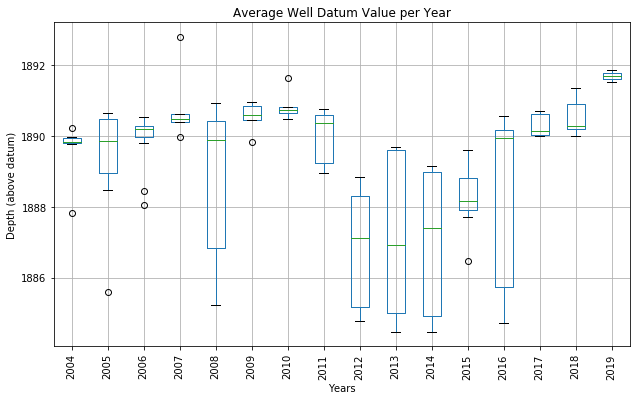

In [11]:
ax = wellData[['sl_lev_va', 'Years']].boxplot(
                by='Years', figsize=(10, 6), rot=90);
ax.set_xlabel('Years');
ax.set_ylabel('Depth (above datum)');
ax.set_title('Average Well Datum Value per Year');
plt.suptitle(''); 

#plt.savefig('gwlevels.jpg')